# 0420 수업 정리
- 보스턴 집 값 예측하기 프로젝트 시작
- 방의 개수와 집값의 예측
- 데이터 전처리

# 0421 수업 요약
- 데이터 학습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
# 보스턴 집값 데이터

from sklearn.linear_model import LinearRegression
# 선형회귀 알고리즘

from sklearn.model_selection import train_test_split

print("Hello World")

Hello World


In [2]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston["feature_names"] # 집값에 영향을 주는 데이터 => 독립 변수들

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston["data"][:5] # 실질적인 데이터, 이때 컬럼은 "feature_names"에 나와있다

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [5]:
boston["target"][:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [6]:
df_boston = pd.DataFrame(boston["data"], columns=boston["feature_names"])
# 딕셔너리를 데이터 프래임으로 만들고 이때 컬럼명은 boston["feature_names"]으로 한다

df_boston["PRICE"] = boston["target"]

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data_input = df_boston["RM"] # 특성중 방의 개수를 독립변수로 지정

data_input = data_input.to_numpy().reshape(-1, 1)
# 종속 변수를 2차원 형태로 변경
# 독립 변수는 여러가지 특성이 있을 수 있기때문에 2차운으로 사용한다.

data_target = df_boston["PRICE"]
# 집값 데이터를 가져오고 종속 변수로 지정
# 종속 변수는 결과값이 하나기 때문의 1차원으로 사용한다. 하지만 2차원도 가능

In [8]:
input_train, input_test, target_train, target_test = train_test_split(data_input, data_target, test_size=0.2, random_state = 18) 
# test_size는 데이터를 분활하는 비율이다. 테스트 데이터의 비율을 받는다.
# 0.2로 지정하는

print(input_train.shape, target_train.shape)
# 학습 데이터의 크기 확인

print(input_test.shape, target_test.shape)
# 평가 데이터의 크기 확인

(404, 1) (404,)
(102, 1) (102,)


# 0421 수업

In [12]:
model_lr = LinearRegression()
model_lr.fit(input_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model_lr.predict([[5]])

array([10.96643661])

Text(0, 0.5, '가격')

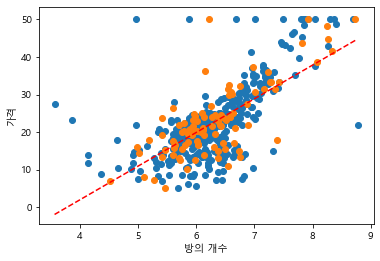

In [21]:
x = np.arange(np.min(data_input), np.max(data_input), 0.1).reshape(-1, 1)

plt.scatter(input_train, target_train)
plt.scatter(input_test, target_test)
plt.plot(x, model_lr.predict(x), "r--")

plt.rc("font", family="Malgun Gothic")
plt.xlabel("방의 개수")
plt.ylabel("가격")

In [25]:
score_test = model_lr.score(input_test, target_test)
print(score_test)

0.5857537588447368


#### 방값이 아닌 인당 범죄율로 집값 예측

In [29]:
data_input_crim = df_boston["CRIM"].to_numpy().reshape(-1, 1)
data_input_crim

array([[6.32000e-03],
       [2.73100e-02],
       [2.72900e-02],
       [3.23700e-02],
       [6.90500e-02],
       [2.98500e-02],
       [8.82900e-02],
       [1.44550e-01],
       [2.11240e-01],
       [1.70040e-01],
       [2.24890e-01],
       [1.17470e-01],
       [9.37800e-02],
       [6.29760e-01],
       [6.37960e-01],
       [6.27390e-01],
       [1.05393e+00],
       [7.84200e-01],
       [8.02710e-01],
       [7.25800e-01],
       [1.25179e+00],
       [8.52040e-01],
       [1.23247e+00],
       [9.88430e-01],
       [7.50260e-01],
       [8.40540e-01],
       [6.71910e-01],
       [9.55770e-01],
       [7.72990e-01],
       [1.00245e+00],
       [1.13081e+00],
       [1.35472e+00],
       [1.38799e+00],
       [1.15172e+00],
       [1.61282e+00],
       [6.41700e-02],
       [9.74400e-02],
       [8.01400e-02],
       [1.75050e-01],
       [2.76300e-02],
       [3.35900e-02],
       [1.27440e-01],
       [1.41500e-01],
       [1.59360e-01],
       [1.22690e-01],
       [1.

In [36]:
input_train_crim, input_test_crim, target_train_crim, target_test_crim = train_test_split(data_input_crim, data_target, test_size=0.3, random_state = 18)

model_lr_crim = LinearRegression()
model_lr_crim.fit(input_train_crim, target_train_crim)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, '가격')

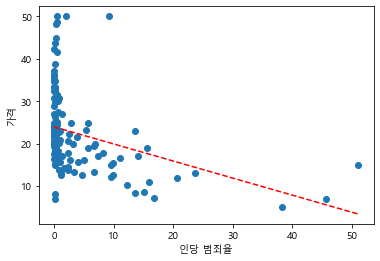

In [60]:
x = np.arange(np.min(input_test_crim), np.max(input_test_crim), 0.1).reshape(-1, 1)

plt.scatter(input_test_crim, target_test_crim)
plt.plot(x, model_lr_crim.predict(x), "r--")

plt.rc("font", family="Malgun Gothic")
plt.xlabel("인당 범죄율")
plt.ylabel("가격")

In [54]:
print(f"훈련 데이터의 개수 : {input_train_crim.shape} {target_train_crim.shape}")
print(f"테스트 데이터의 개수 : {input_test_crim.shape} {target_train_crim.shape}")

print(f"방의 개수(RM)으로 예측한 집 값의 성능 점수 : {score_test}")
print(f"인당 범죄율(CRIM)으로 예측한 집 값의 성능 점수 : {model_lr_crim.score(input_test_crim, target_test_crim)}")

print("따라서 보스터 집값에 더 큰 영향을 주는 특성은 \"방의 개수(RM)\"이다.")

훈련 데이터의 개수 : (354, 1) (354,)
테스트 데이터의 개수 : (152, 1) (354,)
방의 개수(RM)으로 예측한 집 값의 성능 점수 : 0.5857537588447368
인당 범죄율(CRIM)으로 예측한 집 값의 성능 점수 : 0.14158747028921292
따라서 보스터 집값에 더 큰 영향을 주는 특성은 "방의 개수(RM)"이다.
